In [1]:
!pip install ucimlrepo

## This File can also be found here on [Github](https://github.com/MananJain-IITJ/Data-Visualization-t-SNE)
### Note : Plotly plots are not available on Github to see those kindly download the

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Iris Data

## Loading Iris Dataset from UCI Repository
[Dataset Link](https://archive.ics.uci.edu/dataset/53/iris)

In [3]:
iris_data = fetch_ucirepo(id=53)
X = iris_data.data.features
y = iris_data.data.targets
X.head()

sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

In [4]:
y.head()

class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa

In [5]:
data=pd.concat([X,y],axis=1)
data.head()

sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

## Following the [Tutorial](https://github.com/olekscode/Examples-PCA-tSNE/blob/master/Python/Visualizing%20Iris%20Dataset%20using%20PCA%20and%20t-SNE.ipynb)

## Principal Component Analysis (PCA)

In [6]:
pca = PCA(n_components=2)
pca_data=pca.fit_transform(data[X.columns])
pca_data[0:2]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685]])

## Plotting Between The first 2 components


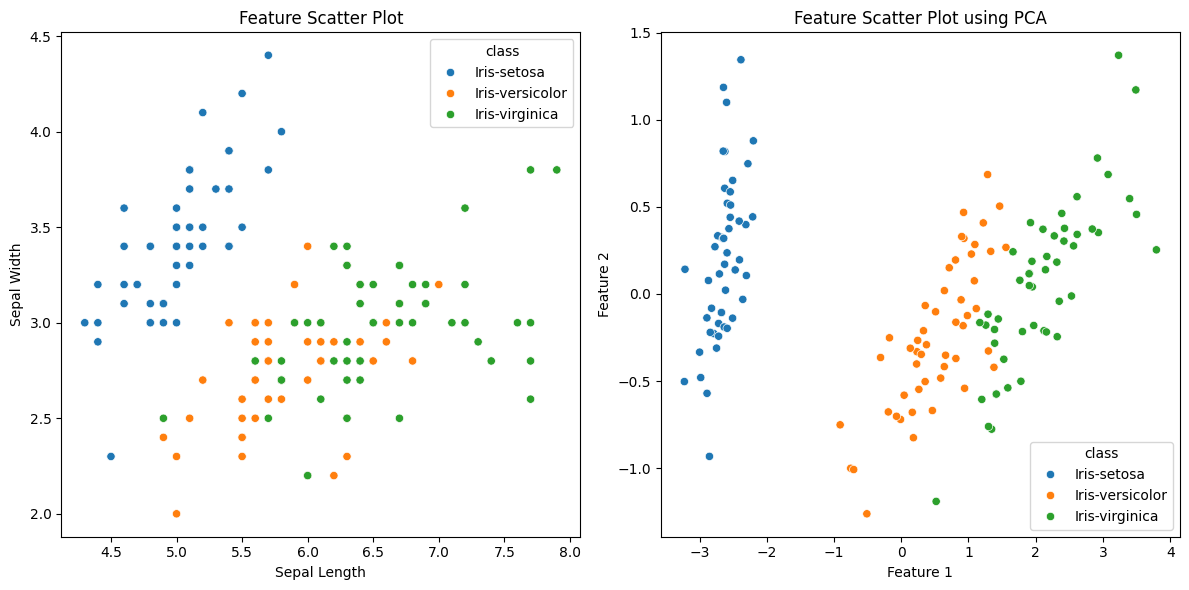

In [7]:
# Create a figure with 2 subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of original data
sns.scatterplot(data=data, x='sepal length', y='sepal width', hue='class', ax=axs[0])
axs[0].set_title("Feature Scatter Plot")
axs[0].set_xlabel('Sepal Length')
axs[0].set_ylabel('Sepal Width')

# Scatter plot using PCA
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['class'], ax=axs[1])
axs[1].set_title("Feature Scatter Plot using PCA")
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()


## Interactive Scatter Plot

In [8]:
fig=px.scatter(
    data,
    x='sepal length',
    y='sepal width',
    color='class'
)
fig.show()

## Interactive Plot Using PCA

In [9]:
fig=px.scatter(
    x=pca_data[:,0],
    y=pca_data[:,1],
    color=data['class']
)
fig.show()

## t-SNE

In [10]:
tsne = TSNE(n_components=2, n_iter=1000)
tsne_data = tsne.fit_transform(data[X.columns])

## 2D t-SNE Plots

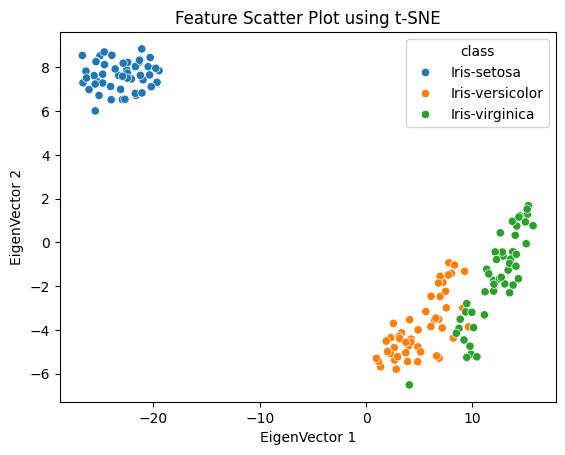

In [11]:
plot=sns.scatterplot(x=tsne_data[:,0],y=tsne_data[:,1],hue=data['class'])
plot.set_title("Feature Scatter Plot using t-SNE")
plot.set_xlabel('EigenVector 1')
plot.set_ylabel('EigenVector 2')
plt.show()

## 3D PCA Plot

In [12]:
pca = PCA(n_components=3)
pca_data=pca.fit_transform(data[X.columns])

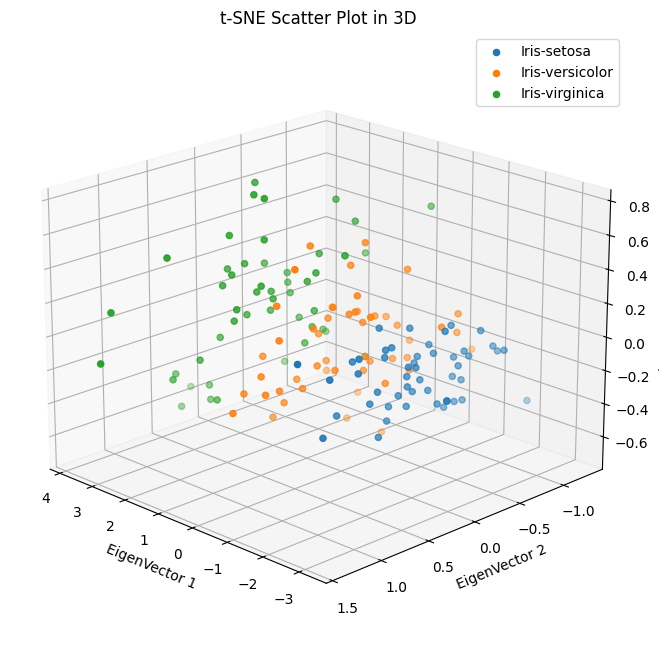

In [13]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique classes
unique_classes = data['class'].unique()

# Scatter plot using matplotlib's scatter function for each class separately
for class_label in unique_classes:
    class_data = pca_data[data['class'] == class_label]
    scatter = ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2], label=class_label)

ax.set_xlabel('EigenVector 1')
ax.set_ylabel('EigenVector 2')
ax.set_zlabel('EigenVector 3')
plt.title('t-SNE Scatter Plot in 3D')

# Change viewing angle
ax.view_init(elev=20, azim=135)

# Add legend
ax.legend()

plt.show()


## 3D t-SNE Plots

In [14]:
tsne = TSNE(n_components=3, n_iter=1000)
tsne_data = tsne.fit_transform(data[X.columns])

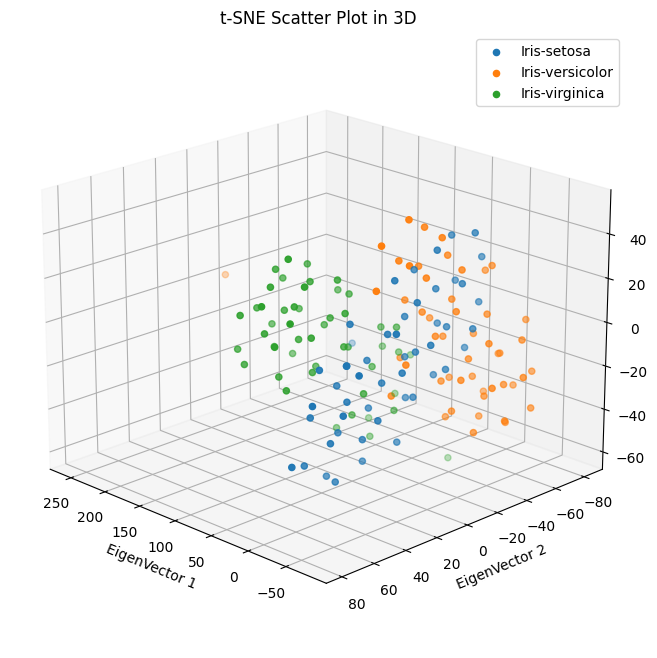

In [15]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique classes
unique_classes = data['class'].unique()

# Scatter plot using matplotlib's scatter function for each class separately
for class_label in unique_classes:
    class_data = tsne_data[data['class'] == class_label]
    scatter = ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2], label=class_label)

ax.set_xlabel('EigenVector 1')
ax.set_ylabel('EigenVector 2')
ax.set_zlabel('EigenVector 3')
plt.title('t-SNE Scatter Plot in 3D')

# Change viewing angle
ax.view_init(elev=20, azim=135)

# Add legend
ax.legend()

plt.show()


# Wine Data Set

## Loading Wine Dataset from Google Colab

In [16]:
wine = pd.read_csv('WineQT.csv')
X = wine.drop(columns=['quality'])
y = wine['quality']
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1  
2      9.8        5   2  
3      9.8        6   3  
4      9.4        5   4

## Using Results from [Lab 5](https://github.com/MananJain-IITJ/Data-Visualization-EDA/blob/main/B21AI021_DV_LAB5.ipynb)


In [17]:
wine=wine.drop(['Id'],axis=1)
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [18]:
data=pd.concat([X,y],axis=1)
data=data.rename(columns={"quality":"class"})
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  Id  class  
0      9.4   0      5  
1      9.8   1      5  
2      9.8   2      5  
3      9.8   3      6  
4      9.4   4      5

## Principal Component Analysis (PCA)

In [19]:
pca = PCA(n_components=2)
pca_data=pca.fit_transform(data[X.columns])
pca_data[0:2]

array([[804.86203613, -18.24195631],
       [804.08454781,  17.02235625]])

## Plotting Between The first 2 components

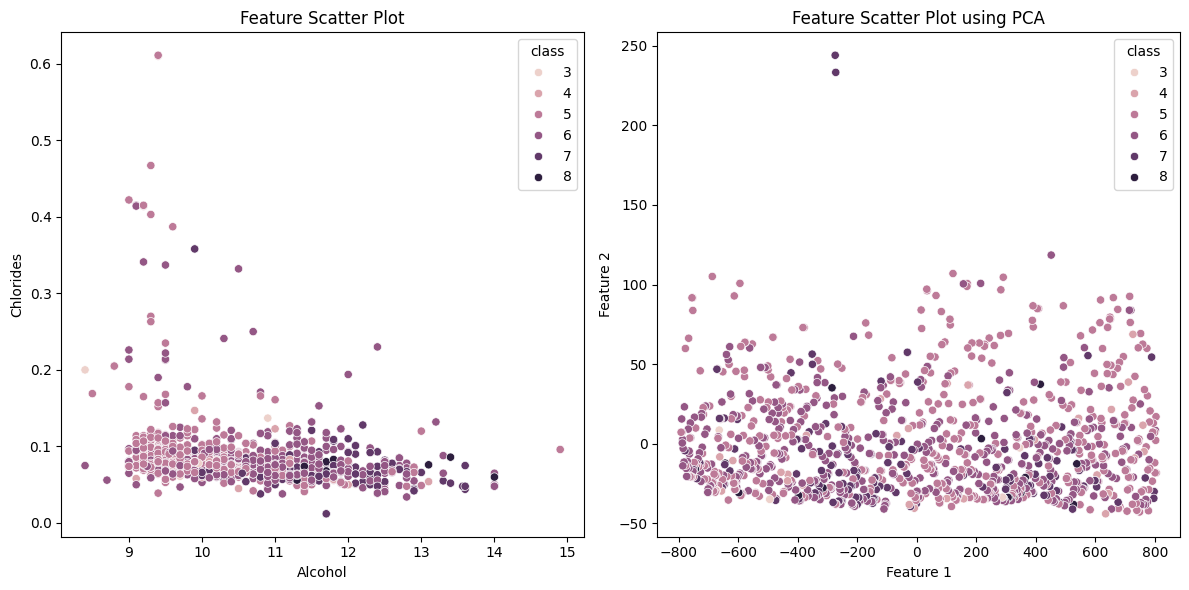

In [20]:
# Create a figure with 2 subplots arranged horizontally
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot of original data
sns.scatterplot(data=data, x='alcohol', y='chlorides', hue='class', ax=axs[0])
axs[0].set_title("Feature Scatter Plot")
axs[0].set_xlabel('Alcohol')
axs[0].set_ylabel('Chlorides')

# Scatter plot using PCA
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['class'], ax=axs[1])
axs[1].set_title("Feature Scatter Plot using PCA")
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

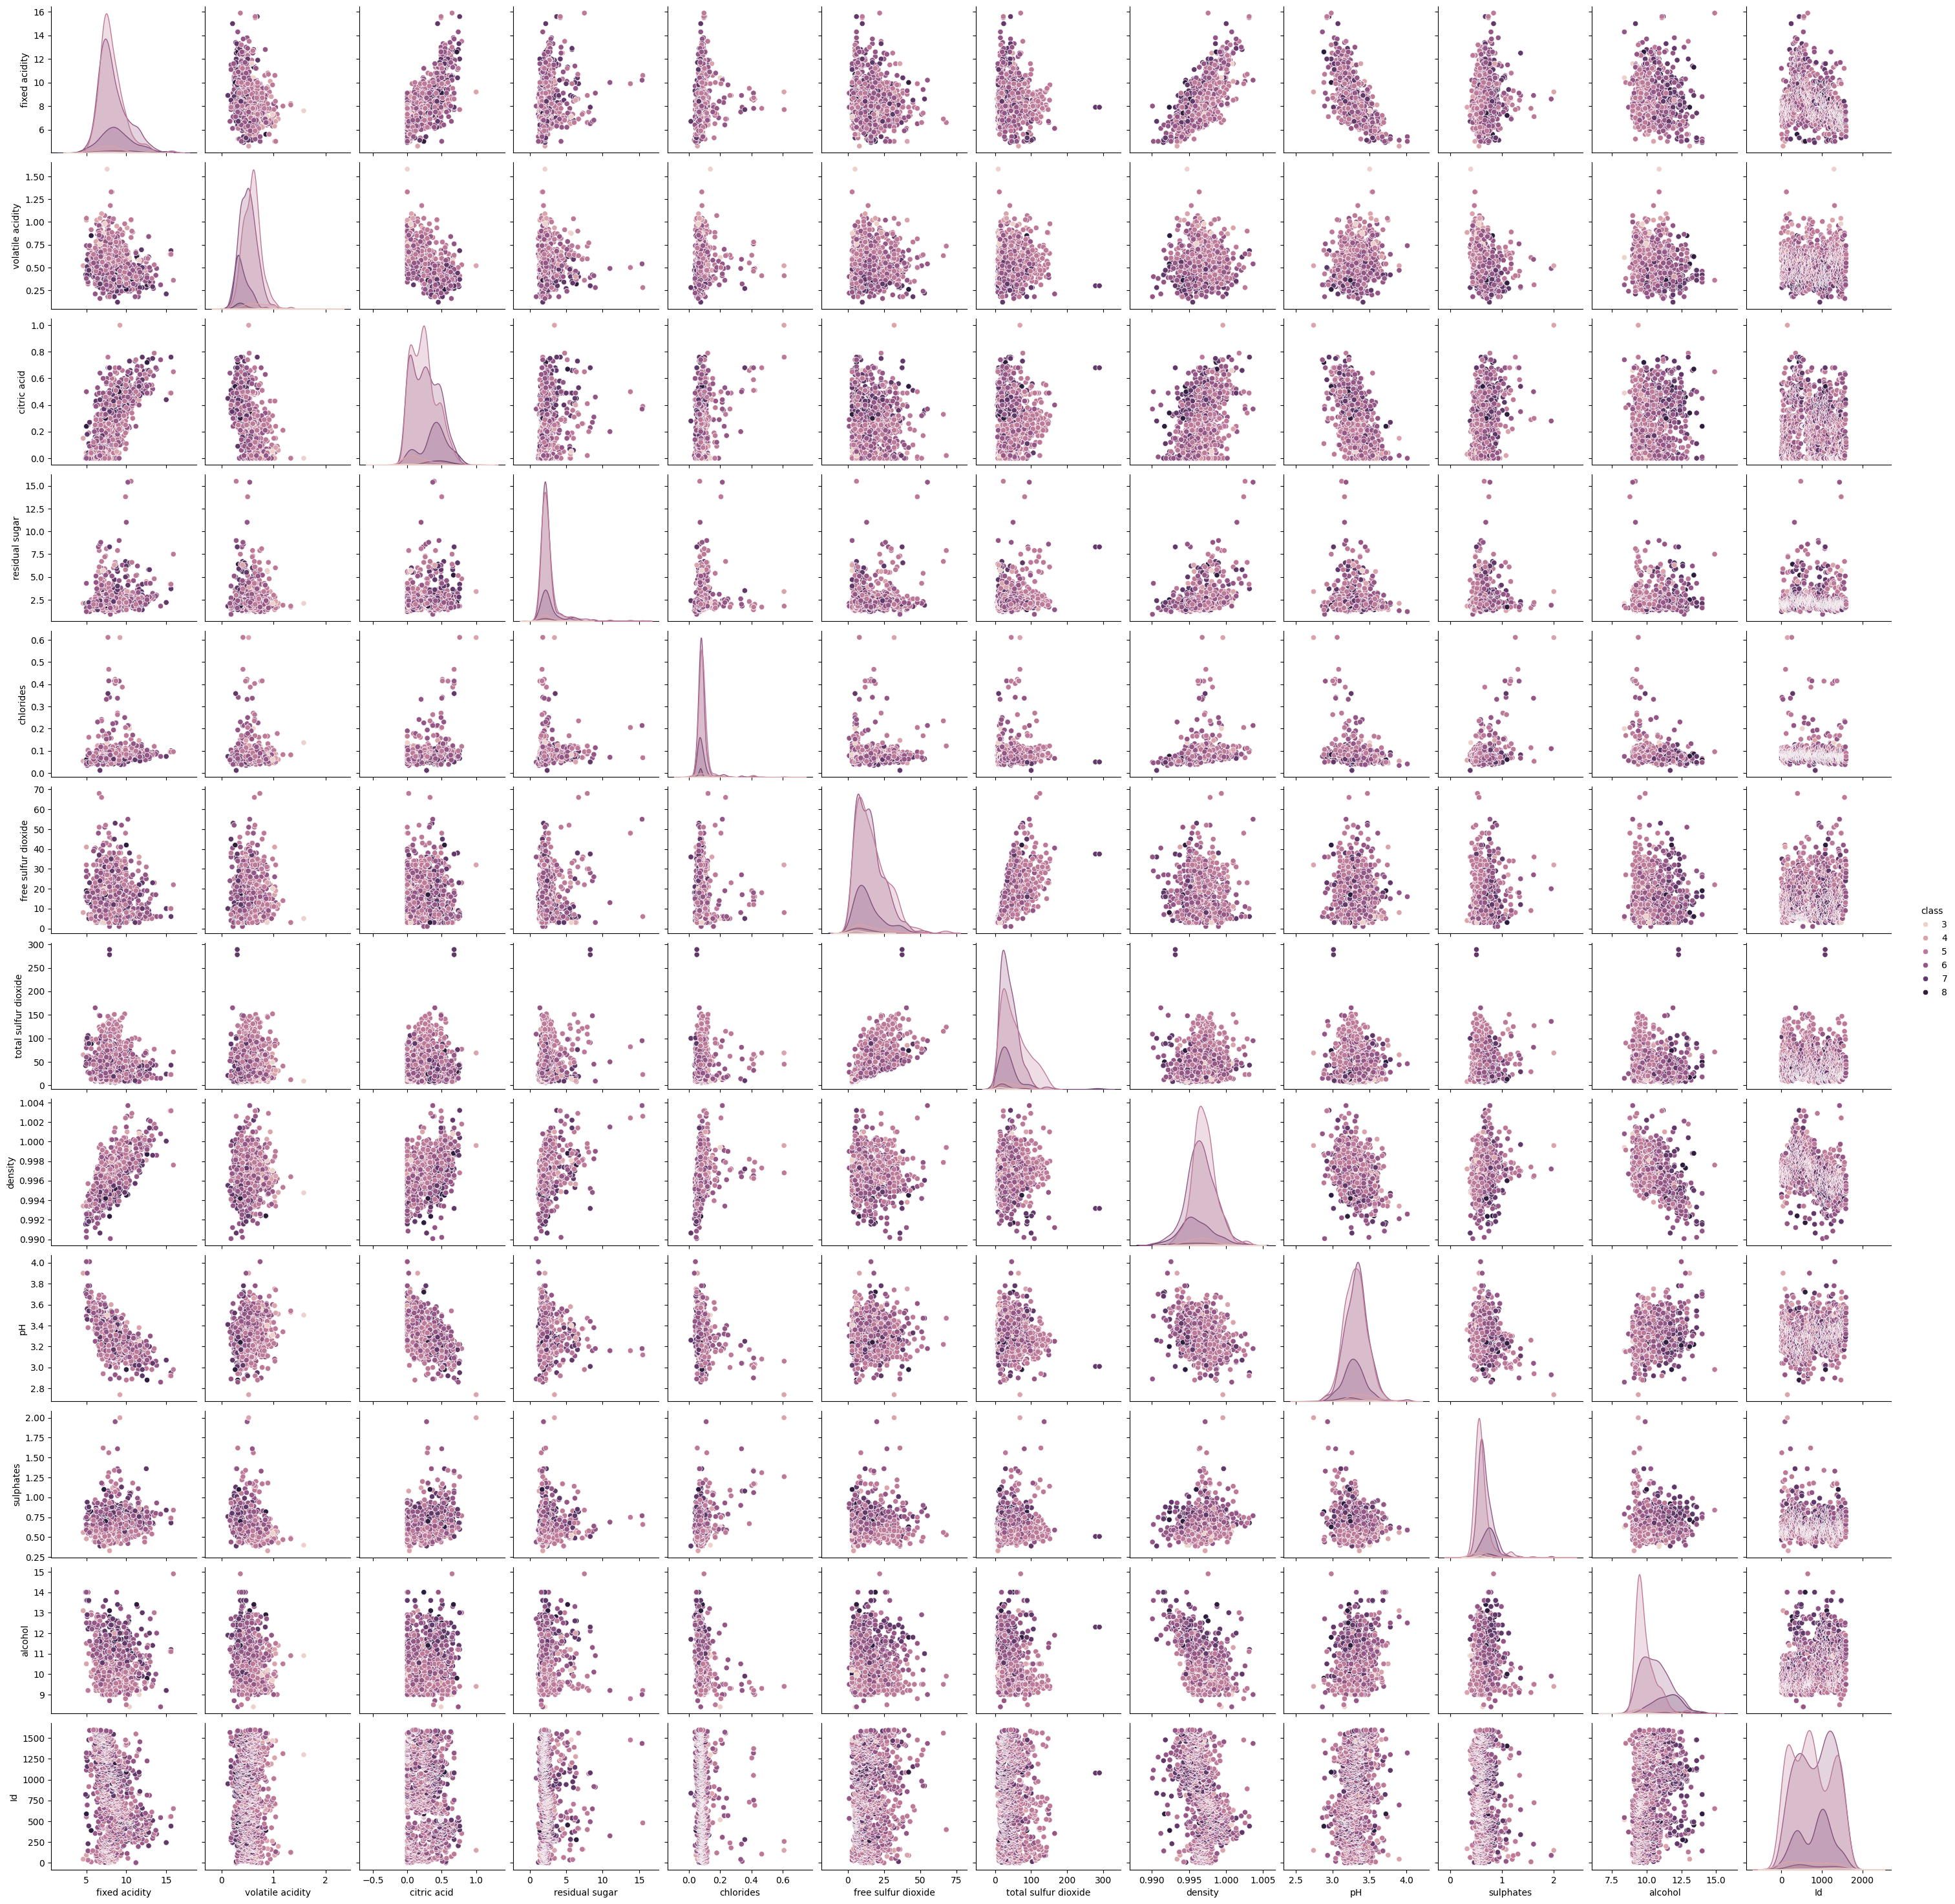

In [21]:
sns.pairplot(data,hue='class')

## Interactive Scatter Plot

In [22]:
fig=px.scatter(
    data,
    x='alcohol',
    y='chlorides',
    color='class'
)
fig.show()

## Interactive Plot Using PCA


In [23]:
fig=px.scatter(
    x=pca_data[:,0],
    y=pca_data[:,1],
    color=data['class']
)
fig.show()

## t-SNE

In [24]:
tsne = TSNE(n_components=2, n_iter=1000)
tsne_data = tsne.fit_transform(data[X.columns])

## 2D t-SNE Plots

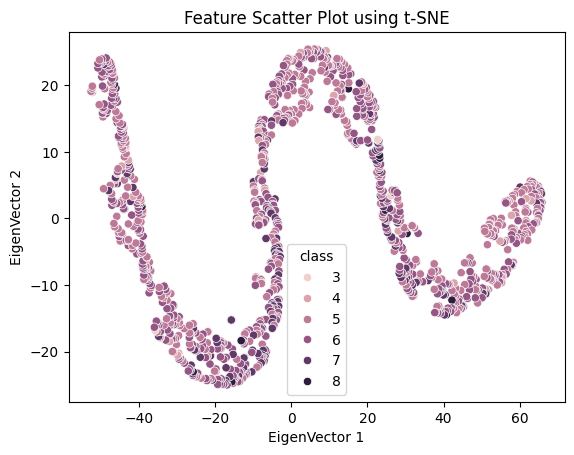

In [25]:
plot=sns.scatterplot(x=tsne_data[:,0],y=tsne_data[:,1],hue=data['class'])
plot.set_title("Feature Scatter Plot using t-SNE")
plot.set_xlabel('EigenVector 1')
plot.set_ylabel('EigenVector 2')
plt.show()

## 3D PCA Plot

In [26]:
pca = PCA(n_components=3)
pca_data=pca.fit_transform(data[X.columns])

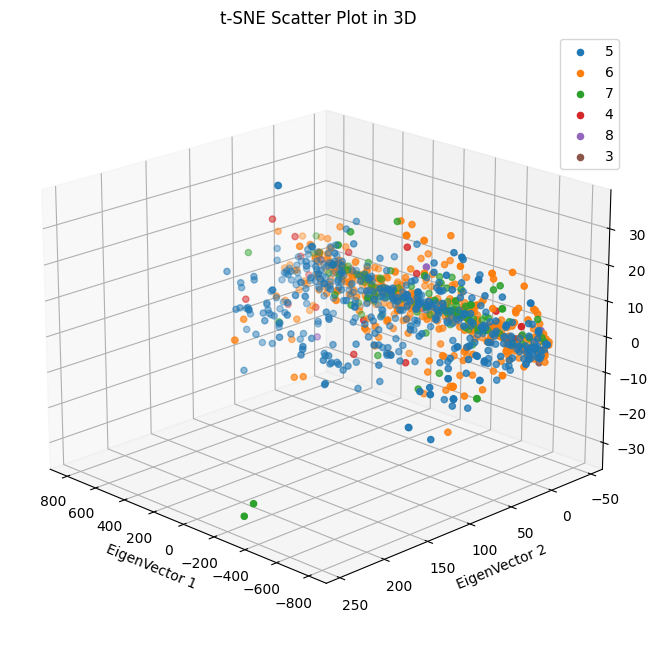

In [27]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique classes
unique_classes = data['class'].unique()

# Scatter plot using matplotlib's scatter function for each class separately
for class_label in unique_classes:
    class_data = pca_data[data['class'] == class_label]
    scatter = ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2], label=class_label)

ax.set_xlabel('EigenVector 1')
ax.set_ylabel('EigenVector 2')
ax.set_zlabel('EigenVector 3')
plt.title('t-SNE Scatter Plot in 3D')

# Change viewing angle
ax.view_init(elev=20, azim=135)

# Add legend
ax.legend()

plt.show()


## 3D t-SNE Plots

In [28]:
tsne = TSNE(n_components=3, n_iter=1000)
tsne_data = tsne.fit_transform(data[X.columns])

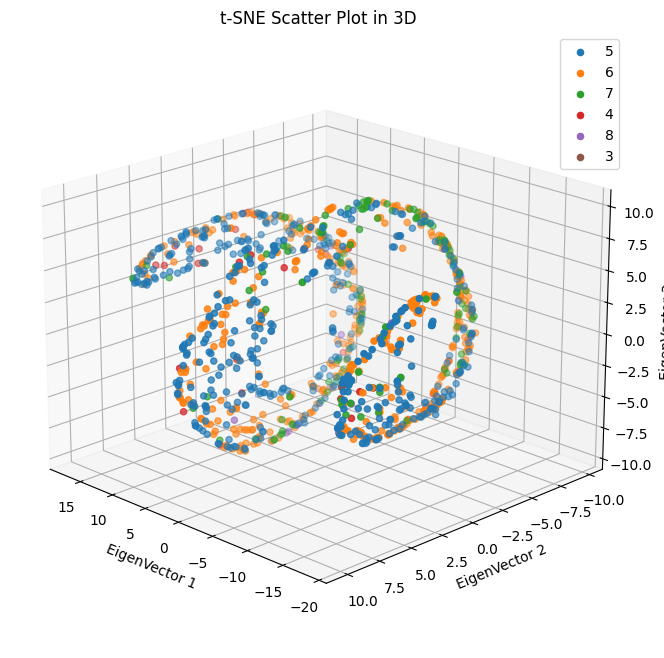

In [29]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Get unique classes
unique_classes = data['class'].unique()

# Scatter plot using matplotlib's scatter function for each class separately
for class_label in unique_classes:
    class_data = tsne_data[data['class'] == class_label]
    scatter = ax.scatter(class_data[:, 0], class_data[:, 1], class_data[:, 2], label=class_label)

ax.set_xlabel('EigenVector 1')
ax.set_ylabel('EigenVector 2')
ax.set_zlabel('EigenVector 3')
plt.title('t-SNE Scatter Plot in 3D')

# Change viewing angle
ax.view_init(elev=20, azim=135)

# Add legend
ax.legend()

plt.show()
